In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pyspark

     |████████████████████████████████| 212.4 MB 57 kB/s 
     |████████████████████████████████| 198 kB 68.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=68bbfb0b57f09d4ff50949effa11eb3ec00c8c7032e36ba35cbb69a90888c075
  Stored in directory: /root/.cache/pip/wheels/a5/0a/c1/9561f6fecb759579a7d863dcd846daaa95f598744e71b02c77
Successfully built pyspark


**important:**
before running the next code you have to manualy paste this jar file: https://github.com/RoiPapo/SparkWetherPredictor/raw/main/mssql-jdbc-9.2.1.jre8.jar

into the Spark\jars folder located on the left panel under files section in the colab

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"
import findspark
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
findspark.init()
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark.sql.types import *
from pyspark.sql.functions import col,avg,sum,min,max,row_number 
import pyspark as ps
from pyspark.sql.window import Window
from pyspark.ml.feature import VectorAssembler
from  pyspark.ml.linalg import Vectors
from pyspark.sql.functions import row_number,lit

def init_spark(app_name: str):
  spark = SparkSession.builder.appName(app_name).getOrCreate()
  sc = spark.sparkContext
  return spark, sc

In [ ]:
def ReadDf(tableName):
  import os
  os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
  os.environ['PYSPARK_SUBMIT_ARGS'] = "--packages=org.apache.spark:spark-sql-kafka-0-10_2.12:3.1.1," \
                                      "com.microsoft.azure:spark-mssql-connector_2.12:1.1.0 pyspark-shell"
  server_name = "jdbc:sqlserver://technionddscourse.database.windows.net:1433"
  database_name = "yarinbs"
  url = server_name + ";" + "databaseName=" + database_name + ";"
  spark = SparkSession.builder.getOrCreate()
  table_name = tableName
  username = "yarinbs"
  password = "Qwerty12!"  # Please specify password here
  format_str = "com.microsoft.sqlserver.jdbc.spark"
  format_str2 = "jdbc"
  format_str3 = "com.mysql.jdbc.Driver"
  jdbcDF = spark.read \
      .format(format_str2) \
      .option("url", url) \
      .option("dbtable", table_name) \
      .option("user", username) \
      .option("password", password).load()
  return jdbcDF


# **insights**

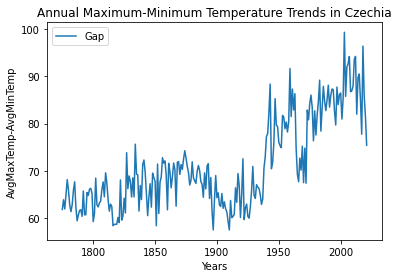

In [ ]:
kafka_df= ReadDf("insight1_post_EZ").toPandas().sort_values(by=['Year'])
plt.plot(kafka_df['Year'], kafka_df['Gap'], label="Gap")
plt.xlabel('Years')
plt.ylabel('AvgMaxTemp-AvgMinTemp')
plt.title('Annual Maximum-Minimum Temperature Trends in Czechia')
plt.legend()
plt.show()

**Insight1(Temporal): based over 100,000,000 samples from Czechia, Since the start of the industrial revolution we can see that the gap between avg Max Temerature and avg Min Temerature, is increasing!**

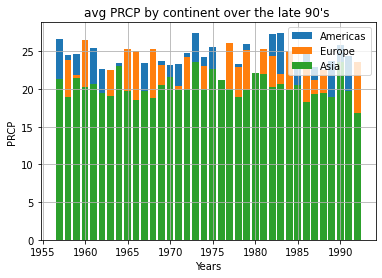

In [ ]:
    continent = {}
    continent["Americas"] = ReadDf("AmericasPostInsight2").toPandas().sort_values(by=['year'])
    continent["Europe"] = ReadDf("EuropePostInsight2").toPandas().sort_values(by=['year'])
    continent["Asia"] = ReadDf("AsiaPostInsight2").toPandas().sort_values(by=['year'])
    i = 0
    for key in continent.keys():
        x = continent[key]["year"]
        y = continent[key]["avg_PRCP"]
        plt.bar(x, y, label=key)
        i = i + 1
    plt.xlabel('Years')
    plt.ylabel('PRCP')
    plt.title('avg PRCP by continent over the late 90\'s ')
    plt.legend()
    plt.grid(True)
    plt.show()

 **Insight 2(Temporal-Spatial): based on over 100,000,000 PRCP samples collected from china, us, czechia, Chile and France during 1955-1992
we can see that the AVG PRCP Asia tend to be lower than the AVG on america and Europe, although we can see inconsistency between Europe and Americas**

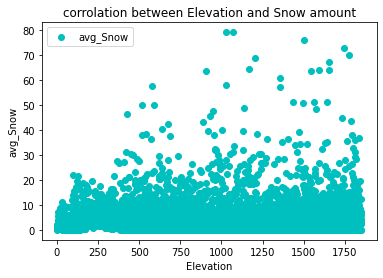

In [ ]:
kafka_df= ReadDf("Insight3_post_USA_Snow").toPandas()
plt.scatter(kafka_df['Elevation'], kafka_df['avg_Snow'], label="avg_Snow", color='c')
plt.xlabel('Elevation')
plt.ylabel('avg_Snow')
plt.title('corrolation between Elevation and Snow amount')
plt.legend()
plt.show()

**Insight 3(Spatial): based on over 100,000,000 PRCP samples collected from the US we can see a suprising lake of corrolation between elevation and snow amount! in places like israel Snow is related to high places but in a cold countries like the USA we can find different amount of snow with NO corrolation to elevation!**